Saving archive (1).zip to archive (1) (1).zip
First 5 rows of the dataset:
   Customer ID  Age  Gender Location  Annual Income  \
0         1001   25  Female   City D          45000   
1         1001   28  Female   City D          52000   
2         1001   28  Female   City D          65000   
3         1001   45  Female   City D          70000   
4         1002   34    Male   City E          45000   

                                    Purchase History  \
0  [{"Date": "2022-03-05", "Category": "Clothing"...   
1  [{"Product Category": "Clothing", "Purchase Da...   
2  [{"Product Category": "Electronics", "Purchase...   
3  {'Purchase Date': '2022-08-15', 'Product Categ...   
4  {'Purchase Date': '2022-07-25', 'Product Categ...   

                                    Browsing History  \
0  [{"Timestamp": "2022-03-10T14:30:00Z"}, {"Time...   
1  [{"Product Category": "Home & Garden", "Timest...   
2  [{"Product Category": "Clothing", "Timestamp":...   
3               {'Timestamp': '20

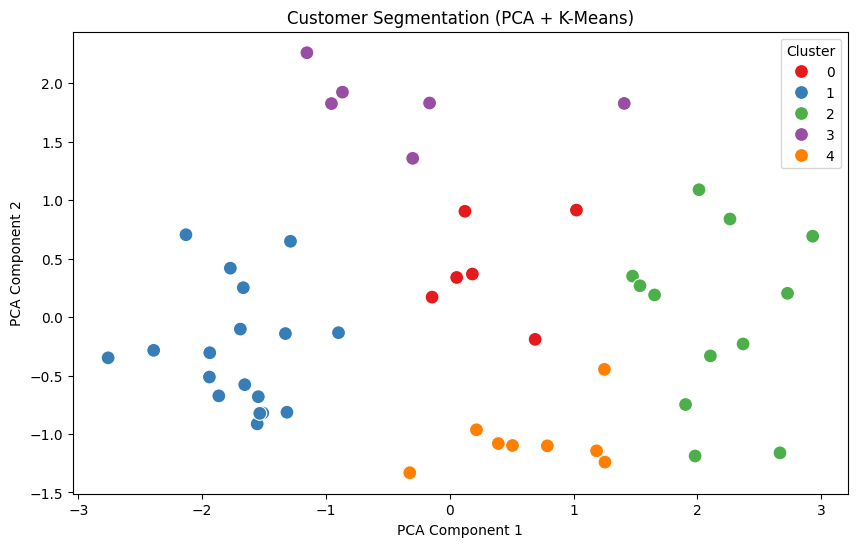


Cluster 0 summary:
       Customer ID        Age  Annual Income  Time on Site
count     6.000000   6.000000       6.000000      6.000000
mean   1006.500000  39.166667   66666.666667    272.200000
std       2.073644   6.462714    8164.965809     77.132691
min    1004.000000  29.000000   55000.000000    180.000000
25%    1005.250000  36.500000   61250.000000    212.500000
50%    1006.500000  40.000000   67500.000000    269.900000
75%    1007.000000  42.000000   73750.000000    323.625000
max    1010.000000  48.000000   75000.000000    378.500000

Cluster 1 summary:
       Customer ID        Age  Annual Income  Time on Site
count    18.000000  18.000000      18.000000     18.000000
mean   1002.055556  30.111111   52166.666667    127.697222
std       1.433721   3.739910    7890.798811     56.871818
min    1001.000000  24.000000   42000.000000     32.500000
25%    1001.000000  28.000000   45000.000000     81.400000
50%    1001.000000  30.000000   50000.000000    120.500000
75%    1003.0000

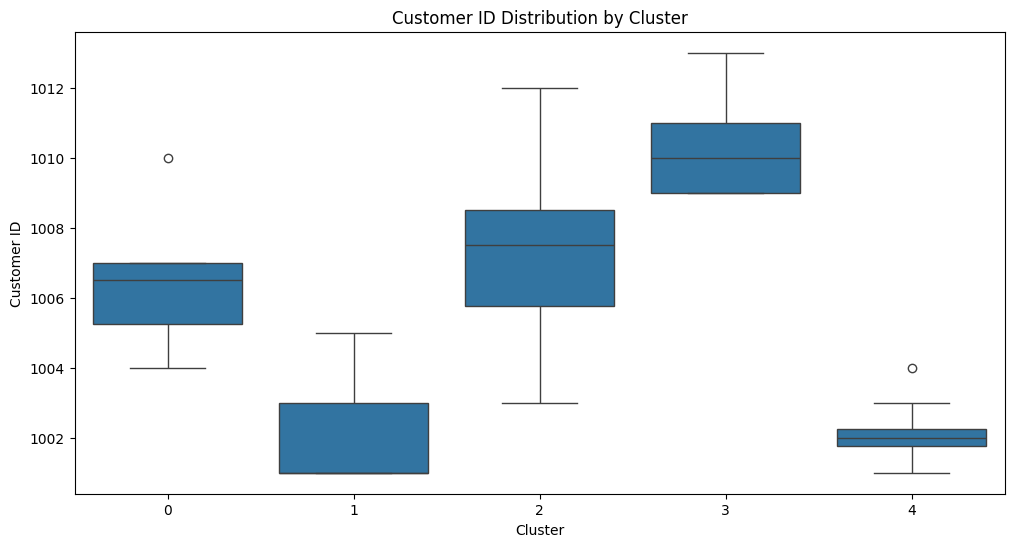

In [ ]:
# ====== 1️⃣ Import libraries ======
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import zipfile
from google.colab import files

# ====== 2️⃣ Upload ZIP file from your device ======
uploaded = files.upload()  #  Select a file ZIP

# ====== 3️⃣ Extract the compressed file ======
zip_path = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("dataset")  # الملفات هتتفك في مجلد dataset

# ====== 4️⃣  Read CSV file ======
# Change the file name if different
df = pd.read_csv("dataset/E-commerce.csv")
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

# ====== 5️⃣ Select numeric columns ======
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
print("\nNumerical features used for clustering:", numerical_features)

X = df[numerical_features]

# ====== 6️⃣ Standardization ======
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ====== 7️⃣ Apply PCA for dimensionality reduction in imaging ======
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ====== 8️⃣ K-Means Clustering ======
k = 5   # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_pca)
df['Cluster'] = clusters

# ====== 9️⃣ # Visualize results ======
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='Set1', s=100)
plt.title("Customer Segmentation (PCA + K-Means)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()

# ====== 🔟 Cluster analysis ======
for i in range(k):
    print(f"\nCluster {i} summary:")
    print(df[df['Cluster'] == i][numerical_features].describe())

# ====== 1️⃣1️⃣ Optional: Boxplot for each cluster  ======
plt.figure(figsize=(12,6))
sns.boxplot(x='Cluster', y=numerical_features[0], data=df)
plt.title(f"{numerical_features[0]} Distribution by Cluster")
plt.show()

